In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 19.4MB/s 


In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

In [0]:
downloaded = drive.CreateFile({'id':'1OYVkERZQgxFZCF1ga8aBz3-FABj8IMU8'}) 
downloaded.GetContentFile('listing_full_fixed.csv')

downloaded = drive.CreateFile({'id':'1NrsuT4Rm1CX9WHHhtXvNtvwx9pvNYXIf'}) 
downloaded.GetContentFile('calendar_ar.csv')


In [0]:
listing = pd.read_csv('listing_full_fixed.csv')
calendar = pd.read_csv('calendar_ar.csv')

In [0]:
calendar.head()

,listing_id,date,available,price
0,21267,3/1/18,t,$75.00
1,21267,3/2/18,t,$75.00
2,21267,3/3/18,t,$75.00
3,21267,3/4/18,t,$75.00
4,21267,3/5/18,t,$75.00


In [0]:
listing.head()

,listing_id,name,host_id,host_name,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,state,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Paris, ÃŽle-de-France, France",EntrepÃ´t,ÃŽle-de-France,48.869933,2.362511,Loft,Entire home/apt,4,2.0,2.0,2.0,Real Bed,$125.00,$0.00,$40.00,1,$0.00,3,1125,1,100.0,t,strict_14_with_grace_period,f,f,0.86
1,5396,Explore the heart of old Paris,7903,Borzou,f,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Paris, Ile-de-France, France",HÃ´tel-de-Ville,Ile-de-France,48.851001,2.358690,Apartment,Entire home/apt,2,1.0,0.0,1.0,Pull-out Sofa,$115.00,$0.00,$36.00,1,$0.00,1,90,156,93.0,t,strict_14_with_grace_period,f,f,1.33
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Paris, ÃŽle-de-France, France",HÃ´tel-de-Ville,ÃŽle-de-France,48.857576,2.352751,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,$115.00,$200.00,$50.00,2,$10.00,10,23,236,94.0,f,moderate,f,f,2.47
3,7964,Large & sunny flat with balcony !,22155,AnaÃ¯s,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Paris, ÃŽle-de-France, France",OpÃ©ra,ÃŽle-de-France,48.874642,2.343411,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,$99.00,$500.00,$60.00,2,$45.00,3,365,6,96.0,f,strict_14_with_grace_period,f,f,0.06
4,8522,GREAT FLAT w/ CITY VIEW,25435,Adrien,f,"['email', 'phone', 'reviews']",t,f,"Paris, Ile-de-France, France",MÃ©nilmontant,Ile-de-France,48.865279,2.393263,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,$90.00,NaN,NaN,1,$0.00,3,365,1,100.0,f,moderate,f,f,0.01


In [0]:
listing_model = listing[['listing_id', 'host_is_superhost','neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds','bed_type', 'instant_bookable', 'cancellation_policy']]

In [0]:
# inner join listing and calendar table
join = pd.merge(listing_model,
                calendar,
                 on='listing_id')

In [0]:
join['date'] = pd.to_datetime(join['date'])

In [0]:
# create a weekday feature
join['weekday'] = [x.weekday() for x in join['date']]


In [0]:
# convert the weekday feature to boolean
 join['weekday'] = [0 if x in [5, 6] else 1 for x in join['weekday']]

In [0]:
join.head()

,listing_id,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,instant_bookable,cancellation_policy,date,available,price,weekday
0,26567,f,Batignolles-Monceau,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,f,strict_14_with_grace_period,2018-02-11,t,$49.00,0
1,26567,f,Batignolles-Monceau,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,f,strict_14_with_grace_period,2018-06-17,t,$49.00,0
2,26567,f,Batignolles-Monceau,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,f,strict_14_with_grace_period,2018-06-18,t,$49.00,1
3,26567,f,Batignolles-Monceau,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,f,strict_14_with_grace_period,2018-06-19,t,$49.00,1
4,26567,f,Batignolles-Monceau,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,f,strict_14_with_grace_period,2018-06-20,t,$49.00,1


In [0]:
day = join[['listing_id','price','weekday']]
day.head(20)

,listing_id,price,weekday
0,26567,$49.00,0
1,26567,$49.00,0
2,26567,$49.00,1
3,26567,$49.00,1
4,26567,$49.00,1
5,26567,$49.00,1
6,26567,$49.00,0
7,26567,$49.00,1
8,26567,$49.00,1
9,26567,$49.00,1


In [0]:
day1 = day.groupby['listing_id','weekday')
day1.head(20)

ValueError: ignored

In [0]:
join.dropna(inplace = True)

In [0]:
join.shape

(140334, 16)

In [0]:

join['price'] = [float(i[1:]) if ',' not in i else float(''.join(i[1:].split(','))) for i in join['price']]

In [0]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140334 entries, 0 to 140333
Data columns (total 16 columns):
listing_id                140334 non-null int64
host_is_superhost         140334 non-null object
neighbourhood_cleansed    140334 non-null object
property_type             140334 non-null object
room_type                 140334 non-null object
accommodates              140334 non-null int64
bathrooms                 140334 non-null float64
bedrooms                  140334 non-null float64
beds                      140334 non-null float64
bed_type                  140334 non-null object
instant_bookable          140334 non-null object
cancellation_policy       140334 non-null object
date                      140334 non-null datetime64[ns]
available                 140334 non-null object
price                     140334 non-null float64
weekday                   140334 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 18.2+ MB


In [0]:
X = join[['host_is_superhost', 'neighbourhood_cleansed','property_type', 'room_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type','instant_bookable', 'cancellation_policy', 'weekday'  ]]

In [0]:
y = join[['price']]

In [0]:
X = pd.get_dummies(X, drop_first = True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF.predict(X_test)
RF.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8459871783080921

In [0]:
importances = RF.feature_importances_

In [0]:
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices]
values = importances[indices]

dict = {}
for i in range(len(columns)):
  dict[columns[i]] = values[i]

property_type = 0
host_is_superhost = 0
bed_type = 0
room_type = 0
cancellation_policy = 0

for i in dict:
  if 'property_type' in i:
    property_type += dict[i]
  elif 'host_is_superhost' in i:
    host_is_superhost += dict[i]
  elif 'bed_type' in i:
    bed_type += dict[i]
  elif 'room_type' in i:
    room_type += dict[i]
  elif 'cancellation_policy' in i:
    cancellation_policy += dict[i]

    
dict['property_type'] = property_type
dict['host_is_superhost'] = host_is_superhost
dict['bed_type'] = bed_type
dict['room_type'] = room_type
dict['cancellation_policy'] = cancellation_policy
new_columns = ['bathrooms', 'accommodates', 'beds','bedrooms','weekday','instant_bookable_t']
new_values = [dict['bathrooms'], dict['accommodates'], dict['beds'],dict['bedrooms'],dict['weekday'],dict['instant_bookable_t']]


new_columns = new_columns + ['property_type','host_is_superhost','bed_type','room_type','cancellation_policy']
new_values = new_values + [dict['property_type'],dict['host_is_superhost'],dict['bed_type'],dict['room_type'],dict['cancellation_policy']]


In [0]:

new_columns = ['bathrooms', 'accommodates', 'beds','bedrooms','weekday','instant_bookable_t']
new_values = [dict['bathrooms'], dict['accommodates'], dict['beds'],dict['bedrooms'],dict['weekday'],dict['instant_bookable_t']]


new_columns = new_columns + ['property_type','host_is_superhost','bed_type','room_type','cancellation_policy']
new_values = new_values + [dict['property_type'],dict['host_is_superhost'],dict['bed_type'],dict['room_type'],dict['cancellation_policy']]
new_dict = {}
for i in range(len(new_columns)):
  new_dict[new_columns[i]] = new_values[i]

new_dict = sorted(new_dict.items(),key = lambda k:k[1],reverse=True)
print(new_dict)
#print(new_values)

[('bathrooms', 0.3268446568970319), ('cancellation_policy', 0.16344819604973707), ('accommodates', 0.14077160109659145), ('property_type', 0.14043383029524323), ('beds', 0.11487809339269861), ('bedrooms', 0.05694815816501651), ('instant_bookable_t', 0.03579332782177761), ('host_is_superhost', 0.013347099805138238), ('room_type', 0.005345629296021211), ('bed_type', 0.001416108335680601), ('weekday', 0.0007732988450634378)]


In [0]:
new_df = pd.DataFrame()
a,b = [],[]
for i in new_dict:
  a.append(i[0])
  b.append(i[1])
new_df['Feature'] = a
new_df['Weight'] = b
new_df.head(2)

,Feature,Weight
0,bathrooms,0.326845
1,cancellation_policy,0.163448


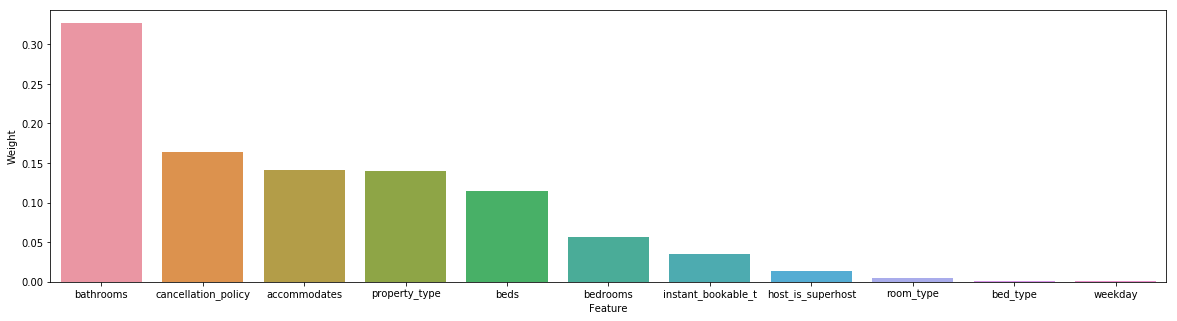

In [0]:
import seaborn as sns
import matplotlib.pyplot as pl
fig = pl.figure(figsize = (20,5))
sns.barplot(x='Feature',y='Weight',data=new_df)

In [0]:
import matplotlib.pyplot as pl

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = pl.figure(figsize = (20,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(10), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(10), columns)
    pl.xlim((-0.5, 10))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

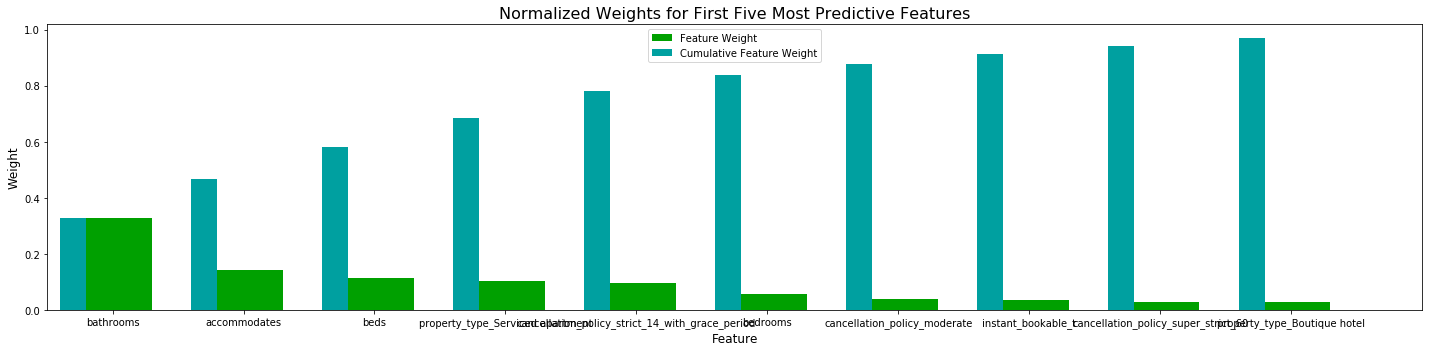

In [0]:
feature_plot(importances, X_train, y_train)

In [0]:
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
bathrooms: 0.3268
accommodates: 0.1408
beds: 0.1149
property_type_Serviced apartment: 0.1038
cancellation_policy_strict_14_with_grace_period: 0.0953
bedrooms: 0.0569
cancellation_policy_moderate: 0.0404
instant_bookable_t: 0.0358
cancellation_policy_super_strict_60: 0.0278
property_type_Boutique hotel: 0.0276
host_is_superhost_t: 0.0133
property_type_Loft: 0.0042
room_type_Private room: 0.0028
property_type_Condominium: 0.0026
room_type_Shared room: 0.0025
property_type_Bed and breakfast: 0.0012
property_type_Other: 0.001
bed_type_Pull-out Sofa: 0.0009
weekday: 0.0008
bed_type_Real Bed: 0.0004
bed_type_Futon: 0.0001
property_type_Townhouse: 0.0
property_type_House: 0.0
property_type_Guesthouse: 0.0
property_type_Guest suite: 0.0


In [0]:
# from google.colab import files
# join.to_csv('join.csv', index = False)
# files.download('join.csv')

In [0]:
join_corr = join.drop(columns = 'listing_id')

In [0]:
# calculate the correlation matrix
corr = join_corr.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [0]:


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', vmax=.8, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Table")\
    .set_precision(2)\
    .set_table_styles(magnify())